# **LOAD ALL THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

In [ ]:
data = pd.read_csv('/content/google_review_ratings.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [ ]:
data.drop(['User','Category 11','Unnamed: 25'],axis = 1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5456 non-null   float64
 1   Category 2   5456 non-null   float64
 2   Category 3   5456 non-null   float64
 3   Category 4   5456 non-null   float64
 4   Category 5   5456 non-null   float64
 5   Category 6   5456 non-null   float64
 6   Category 7   5456 non-null   float64
 7   Category 8   5456 non-null   float64
 8   Category 9   5456 non-null   float64
 9   Category 10  5456 non-null   float64
 10  Category 12  5455 non-null   float64
 11  Category 13  5456 non-null   float64
 12  Category 14  5456 non-null   float64
 13  Category 15  5456 non-null   float64
 14  Category 16  5456 non-null   float64
 15  Category 17  5456 non-null   float64
 16  Category 18  5456 non-null   float64
 17  Category 19  5456 non-null   float64
 18  Category 20  5456 non-null   float64
 19  Catego

In [ ]:
data.dropna(axis = 1,inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5456 non-null   float64
 1   Category 2   5456 non-null   float64
 2   Category 3   5456 non-null   float64
 3   Category 4   5456 non-null   float64
 4   Category 5   5456 non-null   float64
 5   Category 6   5456 non-null   float64
 6   Category 7   5456 non-null   float64
 7   Category 8   5456 non-null   float64
 8   Category 9   5456 non-null   float64
 9   Category 10  5456 non-null   float64
 10  Category 13  5456 non-null   float64
 11  Category 14  5456 non-null   float64
 12  Category 15  5456 non-null   float64
 13  Category 16  5456 non-null   float64
 14  Category 17  5456 non-null   float64
 15  Category 18  5456 non-null   float64
 16  Category 19  5456 non-null   float64
 17  Category 20  5456 non-null   float64
 18  Category 21  5456 non-null   float64
 19  Catego

In [ ]:
linkage_data = linkage(data, method = 'ward', metric = 'euclidean')

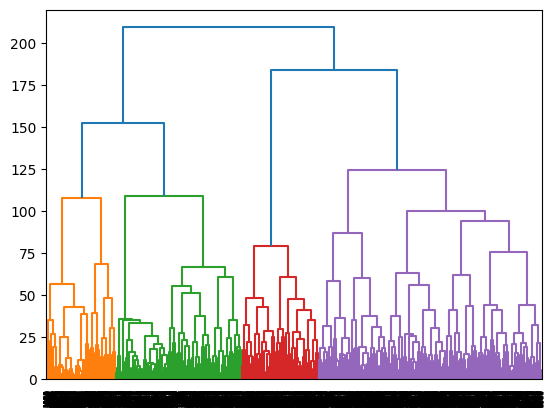

In [ ]:
dendrogram(linkage_data)
plt.show()

In [ ]:
hierarchial_cluster = AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean',linkage = 'ward')

In [ ]:
labels = hierarchial_cluster.fit_predict(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
labels

array([0, 0, 0, ..., 2, 2, 2])

# **dilhoutte score for evaluation**

In [ ]:
data['hierarchial clusters'] = labels

In [ ]:
data.columns

Index(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10',
       'Category 13', 'Category 14', 'Category 15', 'Category 16',
       'Category 17', 'Category 18', 'Category 19', 'Category 20',
       'Category 21', 'Category 22', 'Category 23', 'hierarchial clusters'],
      dtype='object')

In [ ]:
from sklearn.metrics import silhouette_score
print(silhouette_score(data.iloc[:,:-1],data['hierarchial clusters']))

0.11995109658866675


<Axes: >

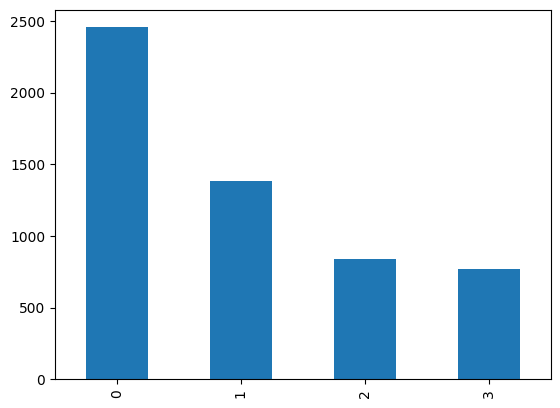

In [ ]:
data['hierarchial clusters'].value_counts().plot(kind = 'bar')